## EX00
#### Установите соединение с базой данных

In [6]:
# 1. Импорт необходимых библиотек
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# 2. Установка соединения с базой данных
conn = sqlite3.connect('../data/checking-logs.sqlite')

#### Выборка из pageviews только пользователей (uid ≠ admin)

In [7]:
query = """
SELECT datetime
FROM pageviews
WHERE uid NOT LIKE 'admin%'
"""
df = pd.read_sql(query, conn)

#### Создание датафрйема и группировка по дате

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
visits_per_day = df.groupby('date').size().reset_index(name='views')

#### Построение графика

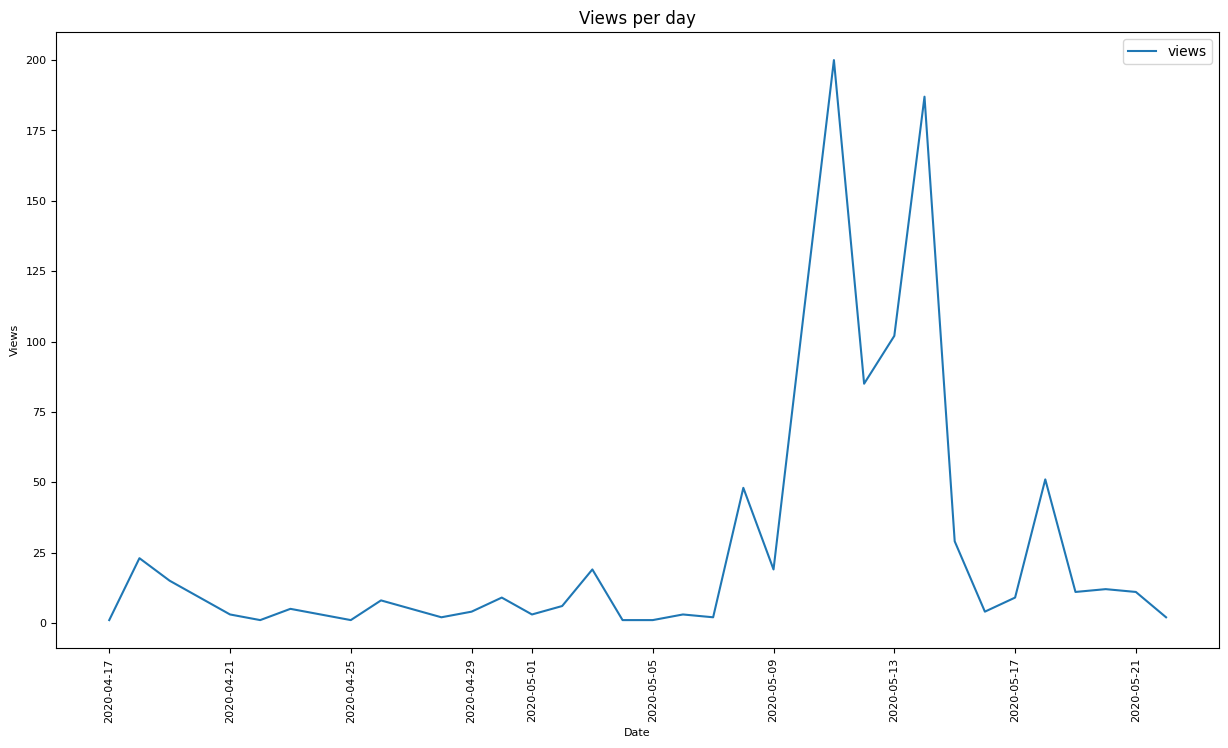

In [9]:
# 7. Построение графика с использованием pandas.plot()
ax = visits_per_day.plot(
    x='date',
    y='views',
    figsize=(15, 8),              # размер графика
    fontsize=8,                   # размер шрифта
    title='Views per day',       # заголовок
    legend=True,                # легенда
    grid=False,                   # сетка для наглядности
    rot=90                       # поворот меток оси X
)

# 8. Установка подписей осей
ax.set_xlabel("Date", fontsize=8)
ax.set_ylabel("Views", fontsize=8);

#### Закрытие соединения

In [10]:
conn.close()